<a href="https://colab.research.google.com/github/danielifernandes33/-reprograma_aula01-/blob/main/analise_dados_datahackers_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

Neste notebook, analisaremos os dados da pesquisa anual do DataHackers de 2022, uma fonte rica de informações sobre o mercado de Tecnologia da Informação (TI) no Brasil. A pesquisa abrange diversos tópicos relevantes para profissionais, empresas e instituições de ensino, oferecendo uma visão abrangente sobre o setor.

Essa pesquisa é fundamental, pois revela tendências, demandas e desafios enfrentados pelos profissionais de TI no Brasil. Ela também desempenha um papel importante no debate sobre diversidade, abordando questões de gênero, raça e inclusão no setor.

Nosso objetivo com essa análise é duplo: primeiro, praticar técnicas de análise de dados utilizando Python e bibliotecas como pandas, matplotlib e seaborn. Segundo, identificar padrões, tendências e insights relevantes sobre o mercado de TI no Brasil.

Além de explorar aspectos como salários, níveis de escolaridade e tecnologias mais utilizadas, daremos atenção especial à diversidade, investigando a representatividade de gênero e raça no setor.

# Importações e Configuração Inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st
from scipy.stats import chi2_contingency
import sqlite3

In [2]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Carregamento e Exploração de Dados

## DataFrame Principal

In [3]:
# Carregando a planilha de dados
df = pd.read_excel("/content/drive/MyDrive/Curso Análise de Dados Programaria/planilha_modulo3.xlsx")

In [4]:
# Explorando os Dados

# Primeiras linhas
df.head()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,#######,...,Setor Público,Acima de 3.000,FALSO,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,#######,...,Outra Opção,Acima de 3.000,#######,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,#######,...,Finanças ou Bancos,Acima de 3.000,FALSO,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,#######,...,Setor Automotivo,Acima de 3.000,FALSO,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,#######,...,Setor Público,de 101 a 500,FALSO,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0


In [5]:
# Deletar coluna "Unnamed: 0"
df = df.drop('Unnamed: 0', axis=1)

In [6]:
# Últimas linhas
df.tail()

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,#######,São Paulo (SP),...,Tecnologia/Fábrica de Software,Acima de 3.000,FALSO,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,#######,Minas Gerais (MG),...,Área de Consultoria,de 51 a 100,FALSO,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,#######,São Paulo (SP),...,Setor Imobiliário/ Construção Civil,de 101 a 500,#######,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0
4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,#######,São Paulo (SP),...,Indústria,de 1.001 a 3.000,FALSO,NaN,Outra Opção,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,989.0
4270,00lb35llmdsidpa00lb35qcdysnzvhv7,24.0,22-24,Masculino,Branca,Não,NaN,NaN,#######,Goiás (GO),...,Agronegócios,de 501 a 1.000,FALSO,NaN,Analista de Dados/Data Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3079.0


In [7]:
print("Dimensões (linhas, colunas):", df.shape)

Dimensões (linhas, colunas): (4271, 27)


In [8]:
print("Número de registros (linhas):", len(df))

Número de registros (linhas): 4271


In [9]:
print("Colunas Disponíveis:", df.columns)

Colunas Disponíveis: Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')


In [10]:
# Informações gerais sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 27 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   ID                                                                                                                         4271 non-null   object 
 1   IDADE                                                                                                                      4197 non-null   float64
 2   FAIXA IDADE                                                                                                                4271 non-null   object 
 3   GENERO                                                                                                                     4262 

In [11]:
# Estatísticas descritivas básicas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IDADE,4197.0,31.169168,6.902803,18.0,26.0,30.0,35.0,54.0
SALARIO,3694.0,10969.266919,19419.753189,35.0,4269.5,7625.5,12778.5,485191.0


###Data Frame Secundário

In [12]:
# Carregando os dados auxiliares para o Engenering Feature
df2 = pd.read_excel('/content/drive/MyDrive/Curso Análise de Dados Programaria/Planilha_Aula_parte2.xlsx')

In [13]:
# Explorando os dados
df2.head()

,ID,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,de 1 a 2 anos,de 7 a 10 anos,True,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL
1,zzls2oftfn9law393oezzls2ofhvfpzd,de 3 a 4 anos,Menos de 1 ano,False,Falta de oportunidade de crescimento no empreg...,"Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,de 3 a 4 anos,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,Não tenho experiência na área de dados,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL


In [14]:
# Últimas linhas
df2.tail()

,ID,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?
4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,de 3 a 4 anos,de 7 a 10 anos,True,NaN,"Sim, fui aprovado e mudei de emprego",Não estou buscando e não pretendo mudar de emp...,"Remuneração/Salário, Benefícios, Flexibilidade...",Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,Análise de Dados,SQL
4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,"Ambiente e clima de trabalho, Plano de carreir...",Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,"SQL, Python"
4268,00zw9ks9d40z4u00zz3d20iix65qpli3,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,"Sim, fui aprovado mas decidi não mudar de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Ambiente e clima de traba...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,"Sim, ocorreram layoffs/demissões em massa na e...",Gestor,NaN
4269,00xu7yujd7s57emj00xu7y0c3njix3de,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,True,NaN,Não participei de entrevistas de emprego/proce...,Estou em busca de oportunidades dentro ou fora...,Oportunidade de aprendizado e trabalhar com re...,Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,"Python, SQL"
4270,00lb35llmdsidpa00lb35qcdysnzvhv7,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,False,"Salário atual não corresponde ao mercado, Falt...","Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% remoto,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,Não ocorreram layoffs/demissões em massa na em...,Análise de Dados,SQL


In [15]:
print("Dimensões (linhas, colunas):", df2.shape)

Dimensões (linhas, colunas): (4271, 14)


In [16]:
print("Número de registros (linhas):", len(df2))

Número de registros (linhas): 4271


In [17]:
print("Colunas Disponíveis:", df2.columns)

Colunas Disponíveis: Index(['ID', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua empresa atual?',
       'Qual o principal motivo da sua insatisfação com a empresa atual?',
       'Você participou de entrevistas de emprego nos últimos 6 meses?',
       'Você pretende mudar de emprego nos próximos 6 meses?',
       'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?',
       'Atualmente qual a sua forma de trabalho?',
       'Qual a forma de trabalho ideal para você?',
       'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?',
       'Sua empresa passu por Layoff em 2022?', 'Atuacao',
       'Quais das linguagens listadas abaixo você utiliza no trabalho?'],
      dtype='object')


In [18]:
# Informações gerais sobre o DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 14 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                     --------------  ----- 
 0   ID                                                                                                                         4271 non-null   object
 1   Quanto tempo de experiência na área de dados você tem?                                                                     3694 non-null   object
 2   Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?  3694 non-null   object
 3   Você está satisfeito na sua empresa atual?                                                                                 3694 non-n

In [19]:
# Estatísticas descritivas básicas
df2.describe().T

,count,unique,top,freq
ID,4271,4270,x4w2zctsfwfqh3q8aphgx4w2zflx9d1u,2
Quanto tempo de experiência na área de dados você tem?,3694,7,de 1 a 2 anos,980
Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,3694,7,Não tive experiência na área de TI/Engenharia ...,1605
Você está satisfeito na sua empresa atual?,3694,2,True,2734
Qual o principal motivo da sua insatisfação com a empresa atual?,960,221,Gostaria de trabalhar em em outra área de atuação,112
Você participou de entrevistas de emprego nos últimos 6 meses?,3694,4,Não participei de entrevistas de emprego/proce...,1672
Você pretende mudar de emprego nos próximos 6 meses?,3694,4,"Não estou buscando, mas me considero aberto a ...",1354
Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,3694,462,"Remuneração/Salário, Benefícios, Flexibilidade...",216
Atualmente qual a sua forma de trabalho?,3694,4,Modelo 100% remoto,1689
Qual a forma de trabalho ideal para você?,3694,4,Modelo híbrido flexível (o funcionário tem lib...,1939


#Tratamento de Dados Faltantes

##Análise da Coluna GENÊRO e preenchimento de valores faltantes

In [20]:
# Agrupa o DataFrame por "GENERO" (incluindo NaN) e conta o número de IDs únicos em cada grupo
df.groupby("GENERO", dropna=False)["ID"].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [21]:
# Substitui valores nulos na coluna "GENERO" por "Prefiro não informar"
df["GENERO"] = df["GENERO"].fillna("Prefiro não informar")

##Análise da Coluna IDADE e preenchimento de valores faltantes

In [22]:
# Conta a frequência de valores nulos e não nulos na coluna "IDADE"
df["IDADE"].isnull().value_counts()

,count
IDADE,
False,4197
True,74


In [23]:
# Filtra o DataFrame para mostrar linhas onde "IDADE" é nula e conta a frequência de cada valor na coluna "FAIXA IDADE"
df[df["IDADE"].isnull()]["FAIXA IDADE"].value_counts()

,count
FAIXA IDADE,
55+,68
17-21,6


In [24]:
# Calcula a média de "IDADE" para a faixa "17-21"
media_17_21 = df[df["FAIXA IDADE"] == "17-21"]["IDADE"].mean()

# Substitui valores nulos em "IDADE" pela média calculada, para as linhas com "FAIXA IDADE" igual a "17-21"
df.loc[(df["FAIXA IDADE"] == "17-21") & (df["IDADE"].isnull()), "IDADE"] = int(media_17_21)


In [25]:
# Calcula a média geral de "IDADE"
media_geral = df["IDADE"].mean()

# Substitui valores nulos em "IDADE" pela média geral, para as linhas com "FAIXA IDADE" igual a "55+"
df.loc[(df["FAIXA IDADE"] == "55+") & (df["IDADE"].isnull()), "IDADE"] = int(media_geral)


In [26]:
df[df["IDADE"].isnull()]["FAIXA IDADE"].value_counts()

,count
FAIXA IDADE,


##Análise da Coluna SALÁRIO e preenchimento de valores faltantes

In [27]:
# Conta a frequência de valores nulos e não nulos na coluna "SALARIO"
df["SALARIO"].isnull().value_counts()

,count
SALARIO,
False,3694
True,577


In [28]:
# Filtra o DataFrame para mostrar linhas onde "SALARIO" é nulo e conta a frequência de cada valor na coluna "FAIXA SALARIAL"
df[df["SALARIO"].isnull()]["FAIXA SALARIAL"].value_counts()

,count
FAIXA SALARIAL,


In [29]:
# Calcula a mediana de "SALARIO"
mediana_salario = df["SALARIO"].median()

# Substitui valores nulos em "SALARIO" pela mediana calculada
df.loc[df["SALARIO"].isnull(), "SALARIO"] = mediana_salario

#Análise Descritiva e Estatísticas Básicas

In [30]:
# Análise geral das IDADES
print("Média de idades:", df['IDADE'].mean())
print("Mediana de idades:", df['IDADE'].median())
print("Desvio padrão da idade:", df['IDADE'].std())
print("Moda da Idade:", df["IDADE"].mode())
print("Variância da Idade:", df["IDADE"].var())
print("Valor Máximo da Idade:", df["IDADE"].max())
print("Valor Mínimo da Idade:", df["IDADE"].min())

Média de idades: 31.150784359634745
Mediana de idades: 30.0
Desvio padrão da idade: 6.855533242256926
Moda da Idade: 0    31.0
Name: IDADE, dtype: float64
Variância da Idade: 46.99833603568975
Valor Máximo da Idade: 54.0
Valor Mínimo da Idade: 18.0


In [31]:
# Média de Idades por Genêro
print("Média de idades por gênero (Feminino):", df[df["GENERO"] == "Feminino"]["IDADE"].mean())
print("Média de idades por gênero (Masculino):", df[df["GENERO"] == "Masculino"]["IDADE"].mean())

Média de idades por gênero (Feminino): 31.294507575757574
Média de idades por gênero (Masculino): 31.134627426424547


In [32]:
# Análise Salárial Geral
print("Média salarial geral:", df["SALARIO"].mean())
print("Mediana salarial geral:", df["SALARIO"].median())
print("Desvio padrão salarial geral:", df["SALARIO"].std())
print("Moda salarial geral:", df["SALARIO"].mode())
print("Variância salarial geral:", df["SALARIO"].var())
print("Valor Máximo salarial geral:", df["SALARIO"].max())
print("Valor Mínimo salarial geral:", df["SALARIO"].min())

Média salarial geral: 10517.53348162023
Mediana salarial geral: 7625.5
Desvio padrão salarial geral: 18096.21098911858
Moda salarial geral: 0    7625.5
Name: SALARIO, dtype: float64
Variância salarial geral: 327472852.162696
Valor Máximo salarial geral: 485191.0
Valor Mínimo salarial geral: 35.0


In [33]:
# Média Salárial por GENÊRO
print("Média salarial por gênero (Feminino):", df[df["GENERO"] == "Feminino"]["SALARIO"].mean())
print("Média salarial por gênero (Masculino):", df[df["GENERO"] == "Masculino"]["SALARIO"].mean())

Média salarial por gênero (Feminino): 8504.556818181818
Média salarial por gênero (Masculino): 11206.075140889167


#Detectando e Corrigindo Outliers

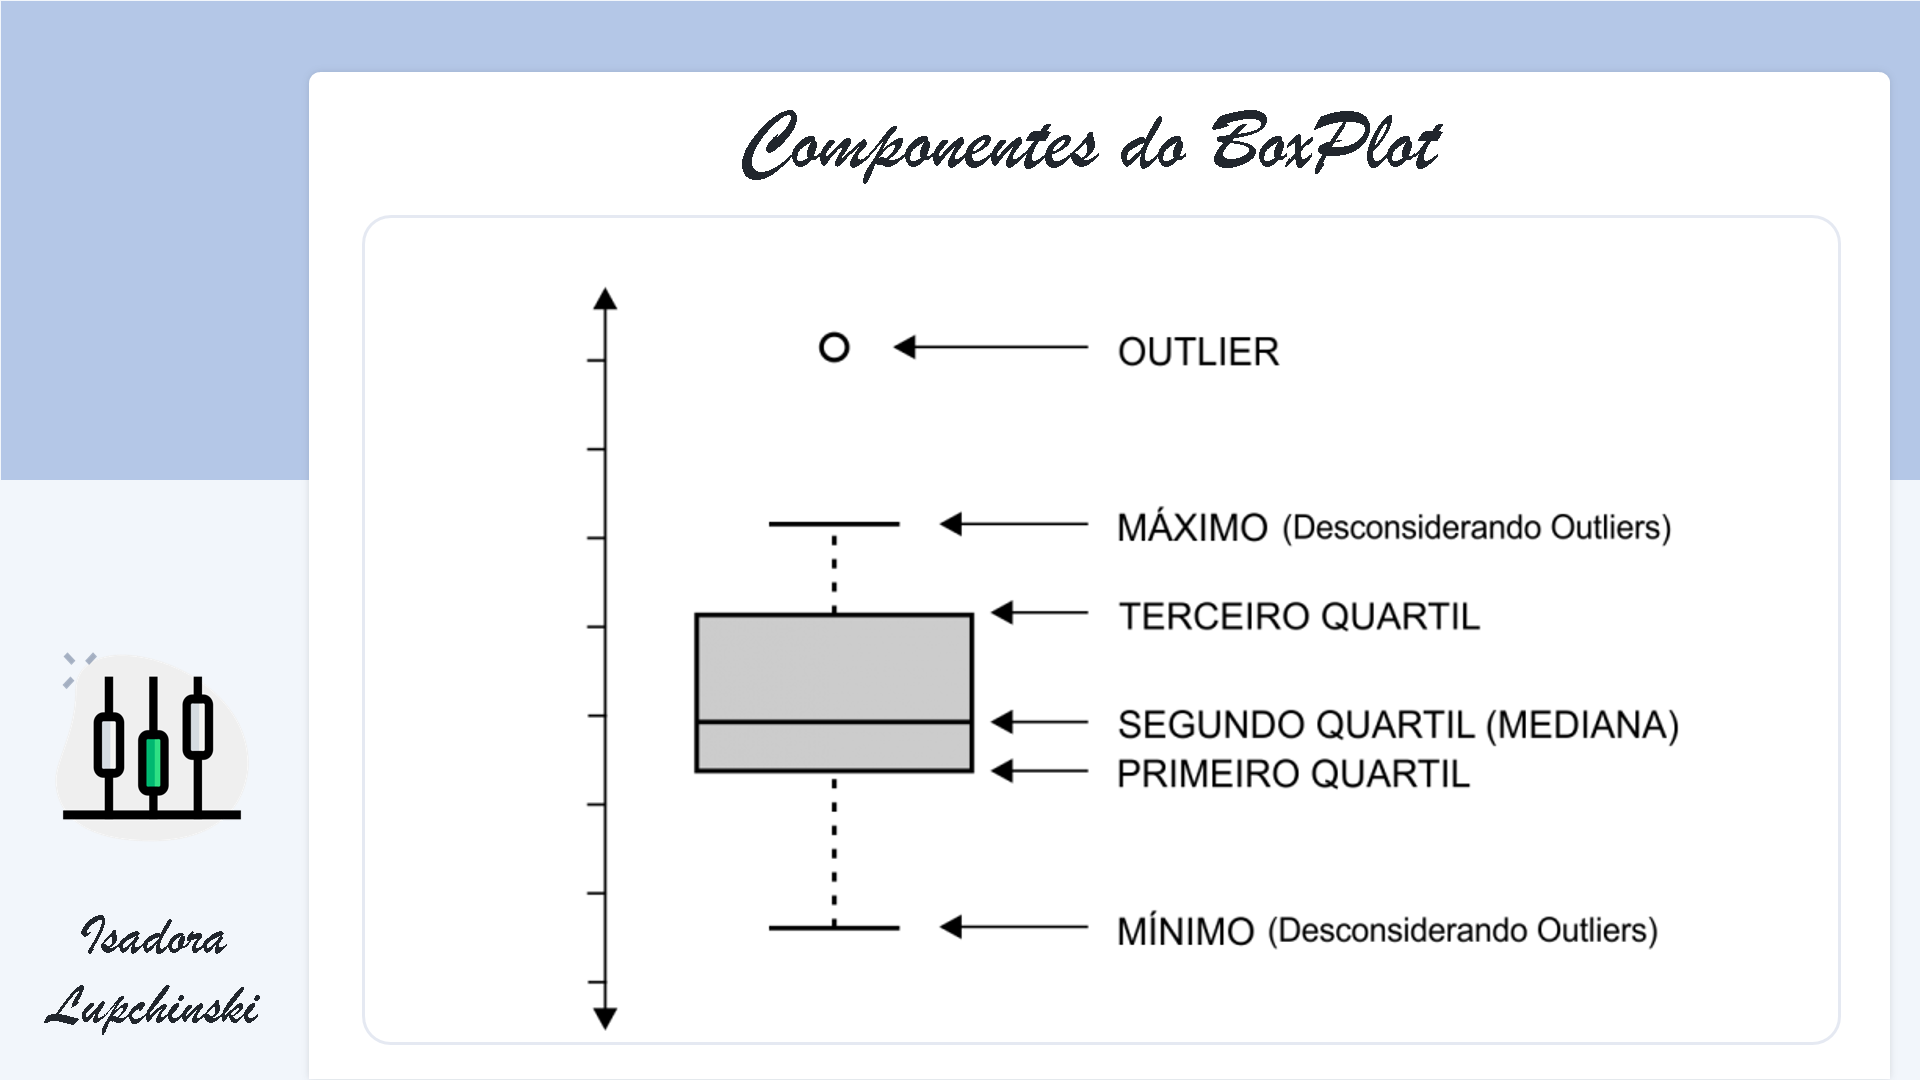

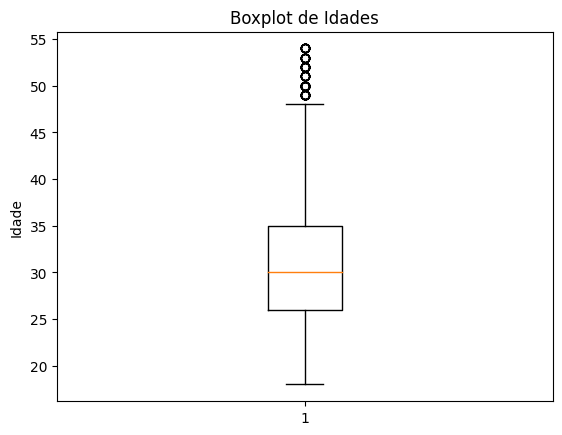

In [34]:
# Plotando o gráfico para vizualização de Outliers para IDADE
plt.boxplot(df["IDADE"])
plt.title("Boxplot de Idades")
plt.ylabel("Idade")
plt.show()

In [35]:
# Vizualizando total por FAIXA SALARIAL
df["FAIXA SALARIAL"].value_counts()

,count
FAIXA SALARIAL,
de R$ 8.001/mês a R$ 12.000/mês,752
de R$ 4.001/mês a R$ 6.000/mês,584
de R$ 6.001/mês a R$ 8.000/mês,527
de R$ 12.001/mês a R$ 16.000/mês,437
de R$ 3.001/mês a R$ 4.000/mês,303
de R$ 2.001/mês a R$ 3.000/mês,285
de R$ 16.001/mês a R$ 20.000/mês,229
de R$ 1.001/mês a R$ 2.000/mês,216
de R$ 20.001/mês a R$ 25.000/mês,134


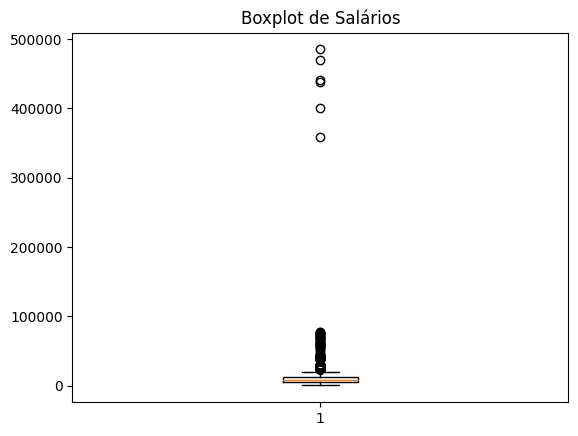

In [36]:
# Plotando o gráfico para vizualização de Outliers para SALÁRIO
plt.boxplot(df["SALARIO"])
plt.title("Boxplot de Salários")
plt.show()

In [37]:
#Estátisticas referentes ao SALÁRIO
media_salario = df["SALARIO"].mean()
print("Média Salarial:", media_salario)
desvio_salario = df["SALARIO"].std()
print("Desvio Padrão Salarial:", desvio_salario)

Média Salarial: 10517.53348162023
Desvio Padrão Salarial: 18096.21098911858


In [38]:
# Detectando e corrigindo outliers nos SALÁRIOS (quartis)
Q1 = df["SALARIO"].quantile(0.25)
print("Q1:", Q1)
Q3 = df["SALARIO"].quantile(0.75)
print("Q3:", Q3)
IQR = Q3 - Q1
print("IQR:", IQR)

Q1: 4751.5
Q3: 11794.5
IQR: 7043.0


In [39]:
# Calcula o limite superior como a média de "SALARIO" mais três vezes o desvio padrão de "SALARIO"
limite_superior = media_salario + (3 * desvio_salario)

# Exibe o limite superior calculado
print("Limite Superior:", limite_superior)


Limite Superior: 64806.166448975964


In [40]:
# Calcula a média dos salários na faixa "Acima de R$ 40.001/mês" que são inferiores ao limite superior e arredonda para duas casas decimais
media_40mais = round(df[(df["FAIXA SALARIAL"] == "Acima de R$ 40.001/mês") & (df["SALARIO"] < limite_superior)]["SALARIO"].mean(), 2)

# Substitui salários que estão acima do limite superior pela média calculada
df["SALARIO"] = np.where((df["SALARIO"] > limite_superior), media_40mais, df["SALARIO"])

# Exibe a média calculada
print(media_40mais)

53127.85


#Intervalo de Confiança para SALÁRIOS

In [41]:
# Calcula a média amostral dos salários
media_amostral = np.mean(df["SALARIO"])
print("Média Amostral:", media_amostral)

# Calcula o desvio padrão amostral dos salários
desvio_amostral = np.std(df["SALARIO"])
print("Desvio Padrão Amostral:", desvio_amostral)

Média Amostral: 9914.31215172091
Desvio Padrão Amostral: 8349.18286776598


In [42]:
# Define o nível de confiança como 95%
nivel_confianca = 0.95

# Calcula o tamanho da amostra dos salários
tamanho_amostra = len(df["SALARIO"])
print("Tamanho da Amostra:", tamanho_amostra)

Tamanho da Amostra: 4271


In [43]:
# Calcula o erro padrão dos salários
erro_padrao = st.sem(df["SALARIO"])
print("Erro Padrão:", erro_padrao)

Erro Padrão: 127.77033567700946


In [44]:
# Calcula o intervalo de confiança para o salário com um nível de confiança de 95%
intervalo_confianca = st.t.interval(nivel_confianca, tamanho_amostra - 1, loc=media_amostral, scale=erro_padrao)

# Exibe o intervalo de confiança calculado
print("Intervalo de confiança para o salário (95%):", intervalo_confianca)

Intervalo de confiança para o salário (95%): (9663.815890731736, 10164.808412710083)


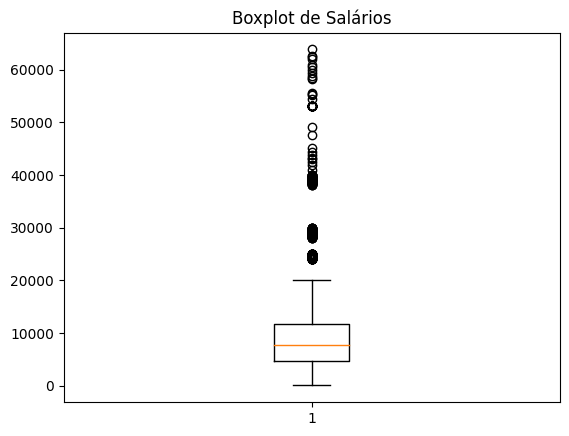

In [45]:
# Plotando o gráfico para vizualização de Outliers para SALÁRIO
plt.boxplot(df["SALARIO"])
plt.title("Boxplot de Salários")
plt.show()

#Featuring Engineering

In [46]:
# Função que preenche o campo "NIVEL" baseado no valor da coluna "GESTOR?"
def preencher_nivel(gestor, nivel):
    # Se o valor de "gestor" for NaN (nulo), retorna o valor original de "nivel"
    if pd.isna(gestor):
        return nivel
    # Se o valor de "gestor" for 'FALSO', também retorna o valor original de "nivel"
    elif gestor == 'FALSO':
        return nivel
    # Caso contrário, atribui "Pessoa Gestora" para o nível
    else:
        return "Pessoa Gestora"

In [47]:
# Remove espaços em branco no início e no final dos nomes das colunas do DataFrame
df.columns = df.columns.str.strip()

In [48]:
# Aplica a função 'preencher_nivel' para cada linha do DataFrame e cria uma nova coluna 'NOVO_NIVEL'
df['NOVO_NIVEL'] = df.apply(lambda x: preencher_nivel(x['GESTOR?'], x['NIVEL']), axis=1)
print(df["NOVO_NIVEL"].value_counts())

NOVO_NIVEL
Pleno             1060
Júnior            1023
Sênior             898
Pessoa Gestora     713
Name: count, dtype: int64


In [49]:
# Criando nova coluna "GERACAO" com base na idade
def determinar_geracao(idade):
    if 39 < idade <= 58:
        return "Geração X"
    elif 29 < idade <= 39:
        return "Millennials"
    elif 13 < idade <= 29:
        return "Geração Z"
    else:
        return "Outra Geração"

In [50]:
# Aplica a função 'determinar_geracao' à coluna "IDADE" para criar uma nova coluna "GERACAO"
df["GERACAO"] = df["IDADE"].apply(determinar_geracao)

# Exibe a contagem dos valores únicos na coluna "GERACAO"
print(df["GERACAO"].value_counts())

GERACAO
Geração Z      1999
Millennials    1761
Geração X       511
Name: count, dtype: int64


In [51]:
# Converte a coluna "NIVEL" em variáveis dummy (colunas binárias), uma para cada nível, e adiciona ao DataFrame
df = pd.get_dummies(df, columns = ['NIVEL'])

In [52]:
# Exibe todos os nomes das colunas do DataFrame
df.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'GERACAO', 'NIVEL_Júnior', 'NIVEL_Pleno',
       'NIVEL_Sênior'],
      dtype='object')

In [53]:
# Realiza uma junção (merge) entre o DataFrame 'df' e 'df2' com base na coluna 'ID', utilizando uma junção à esquerda
df = df.merge(df2, on="ID", how="left")

In [54]:
#Vizualizando o Data Frame após o merge
df.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'GERACAO', 'NIVEL_Júnior', 'NIVEL_Pleno',
       'NIVEL_Sênior',
       'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito n

In [55]:
# Contando as respostas na coluna "Você pretende mudar de emprego nos próximos 6 meses?"
df['Você pretende mudar de emprego nos próximos 6 meses?'].value_counts()

,count
Você pretende mudar de emprego nos próximos 6 meses?,
"Não estou buscando, mas me considero aberto a outras oportunidades",1354
Estou em busca de oportunidades dentro ou fora do Brasil,1011
Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses,978
"Estou em busca de oportunidades, mas apenas fora do Brasil",353


In [56]:
#Criando uma coluna sobre a "Probabilidade de Mudar de Emprego"
df["Probabilidade de Mudar de Emprego"] = df['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('em busca', case=False)

In [57]:
# Contando quantos funcionários possuem alta ou baixa probabilidade de mudar de emprego
df["Probabilidade de Mudar de Emprego"].value_counts()

,count
Probabilidade de Mudar de Emprego,
False,2332
True,1364


In [58]:
#Criando coluna sobre "Aberto a Oportunidades"
df["Aberto a oportunidades"] = df["Você pretende mudar de emprego nos próximos 6 meses?"].str.contains("aberto", case=False)

In [59]:
#Contando quantas pessoas estão abertas a oportunidades
df["Aberto a oportunidades"].value_counts()

,count
Aberto a oportunidades,
False,2342
True,1354


#Análise de Correlação

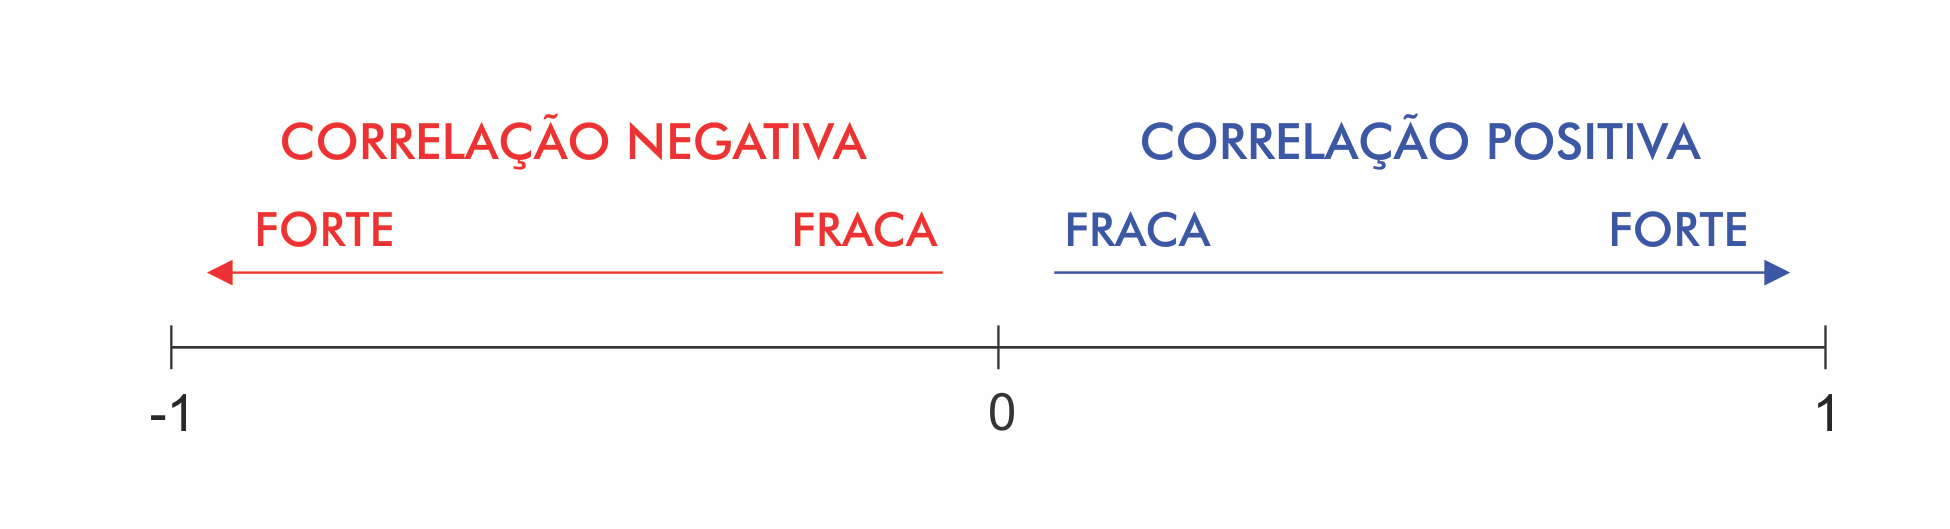

In [60]:
# Correlação entre idade e salário (variáveis contínuas)
correlacao_continua = df["IDADE"].corr(df["SALARIO"])
print("Correlação entre idade e salário:", correlacao_continua)

Correlação entre idade e salário: 0.28937841529921254


In [61]:
# Função que calcula o coeficiente de Cramér para medir a associação entre duas variáveis categóricas
def crawmer_coeficiente(coluna1, coluna2):
    # Cria uma tabela de contingência (tabela cruzada) entre as duas colunas
    tabela_cruzada = np.array(pd.crosstab(coluna1, coluna2))

    # Calcula o valor do qui-quadrado da tabela de contingência
    chi2 = chi2_contingency(tabela_cruzada)[0]

    # Soma todos os valores da tabela de contingência
    soma = np.sum(tabela_cruzada)

    # Determina o menor valor entre o número de linhas e colunas da tabela de contingência, subtraindo 1
    mini = min(tabela_cruzada.shape) - 1

    # Calcula o coeficiente de Cramér
    cramer = np.sqrt(chi2 / (soma * mini))

    return cramer

In [62]:
# Correlação entre "COR/RACA/ETNIA" & "NIVEL DE ENSINO"
cramer_cor_raca_nivel = crawmer_coeficiente(df["COR/RACA/ETNIA"], df["NIVEL DE ENSINO"])
print("Coeficiente de Cramer entre cor/raça e nível de ensino:", cramer_cor_raca_nivel)

Coeficiente de Cramer entre cor/raça e nível de ensino: 0.04499106580480143


In [63]:
# Gerando Tabela Cruzada entre "COR/RACA/ETNIA" & "NIVEL DE ENSINO" e convertendo em um array para melhor vizualização
tabela_cruzada = pd.crosstab(df["COR/RACA/ETNIA"], df["NIVEL DE ENSINO"])
np.array(tabela_cruzada)

array([[  7,  15,  50,  14,   2,   0,  40],
       [127, 365, 999, 355,  65,   8, 827],
       [  0,   2,   4,   2,   0,   0,   3],
       [  0,   0,   6,   3,   1,   0,   7],
       [ 50, 178, 333, 113,  33,   3, 344],
       [  1,   2,  14,   1,   0,   1,   7],
       [  6,  51, 104,  33,   9,   0,  88]])

In [64]:
#Correlação entre "NIVEL DE ENSINO" & "GENERO"
crawmer_nivel_ensino_genero = crawmer_coeficiente(df["NIVEL DE ENSINO"], df["GENERO"])
print("Coeficiente de Cramer entre nível de ensino e gênero:", crawmer_nivel_ensino_genero)

Coeficiente de Cramer entre nível de ensino e gênero: 0.076119232802818


In [65]:
#Gerando Tabela Cruzada entre "NIVEL DE ENSINO" & "GENERO"
tabela_cruzada2 = pd.crosstab(df["NIVEL DE ENSINO"], df["GENERO"])
print(tabela_cruzada2)

GENERO                      Feminino  Masculino  Prefiro não informar
NIVEL DE ENSINO                                                      
Doutorado ou Phd                  57        134                     0
Estudante de Graduação           104        506                     3
Graduação/Bacharelado            365       1138                     7
Mestrado                         133        386                     2
Não tenho graduação formal        24         86                     0
Prefiro não informar               3          8                     1
Pós-graduação                    372        936                     8


#Exportação do DataFrame final para CSV





In [66]:
# Exporta o DataFrame 'df' para um arquivo CSV, sem incluir o índice das linhas
df.to_csv('/content/drive/MyDrive/Curso Análise de Dados Programaria/analise_dados.csv', index=False)

# Conectando SQL com Pandas

In [67]:
# Conexão com o banco de dados
conexao = sqlite3.connect('/content/drive/MyDrive/Curso Análise de Dados Programaria/brasil')

In [68]:
# Verificando a conexão com o SQL

# Cria um cursor para interagir com o banco de dados
cursor = conexao.cursor()

# Executa uma consulta para obter os nomes das tabelas presentes no banco de dados SQLite
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Recupera todos os resultados da consulta e armazena em uma lista
tables = cursor.fetchall()

# Imprime a lista de tabelas encontradas no banco de dados
print(tables)

[('Municipio_Brasileiros',), ('sqlite_sequence',), ('Municipio_Status',), ('Gerencia_Regiao',)]


In [69]:
#consulta sobre Suzano
query = "SELECT * FROM Municipio_Brasileiros WHERE Cidade = 'Suzano'"

In [70]:
pd.read_sql(query, con=conexao)

,Cidade,Estado,Regiao,municipio_ID
0,Suzano,SP,Sudeste,5364


In [71]:
# Carregando os dados do CSV
df3 = pd.read_csv('/content/drive/MyDrive/Curso Análise de Dados Programaria/analise_dados.csv')

In [72]:
# Criando a lista de estados
estados_list = list(df3["UF ONDE MORA"].unique())  # Supondo que df3 tem essa coluna

In [73]:
# Cria uma consulta SQL para calcular a média de renda por estado
query = '''
SELECT Municipio_Brasileiros.Estado,
       AVG(Municipio_Status.Renda) AS Media_Renda
FROM Municipio_Brasileiros
INNER JOIN Municipio_Status ON Municipio_Brasileiros.municipio_ID = Municipio_Status.municipio_ID
WHERE Municipio_Brasileiros.Estado IN ({})
GROUP BY Municipio_Brasileiros.Estado;
'''.format(','.join(['?'] * len(estados_list)))

In [74]:
# Executando a consulta SQL
estados_renda = pd.read_sql(query, conexao, params=estados_list)

In [75]:
# Calculando a correlação entre salário e renda
correlacao_renda_salario = df3["SALARIO"].corr(estados_renda["Media_Renda"])
print("Correlação entre salário e renda:", correlacao_renda_salario)

Correlação entre salário e renda: -0.15859512793375552


##Visualização de dados

In [76]:
genero_counts = df3['GENERO'].value_counts()

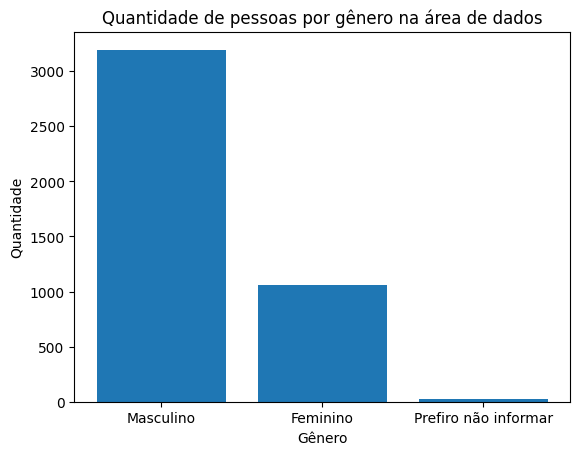

In [77]:
plt.figure()
plt.bar(height = genero_counts.values, x = genero_counts.index)
plt.title('Quantidade de pessoas por gênero na área de dados')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()

<ipython-input-78-eb4bf455b87b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='GENERO', palette = 'pastel')


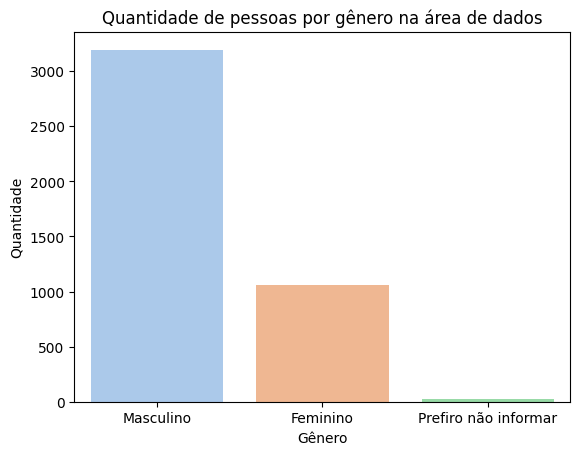

In [78]:
plt.figure()
sns.countplot(data=df, x='GENERO', palette = 'pastel')
plt.title('Quantidade de pessoas por gênero na área de dados')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()

In [79]:
salario_por_idade = df.groupby('IDADE')['SALARIO'].mean()
salario_por_idade

,SALARIO
IDADE,
18.0,4230.307692
19.0,4519.590909
20.0,4778.384615
21.0,4578.737179
22.0,4394.689815
23.0,5602.406897
24.0,6151.622449
25.0,7616.392336
26.0,7700.071174


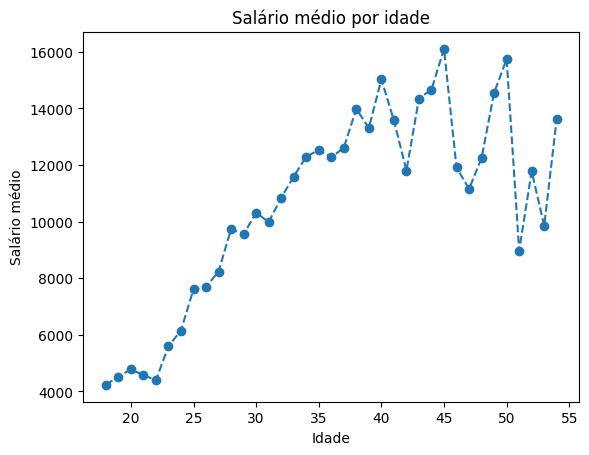

In [80]:
plt.figure()
plt.plot(salario_por_idade.index, salario_por_idade.values, marker = 'o', linestyle= '--')
plt.title('Salário médio por idade')
plt.xlabel('Idade')
plt.ylabel('Salário médio')
plt.show()

In [81]:
fig = px.line(salario_por_idade.reset_index(), x='IDADE', y='SALARIO', title='Salário médio por idade', markers = True )
fig.show()

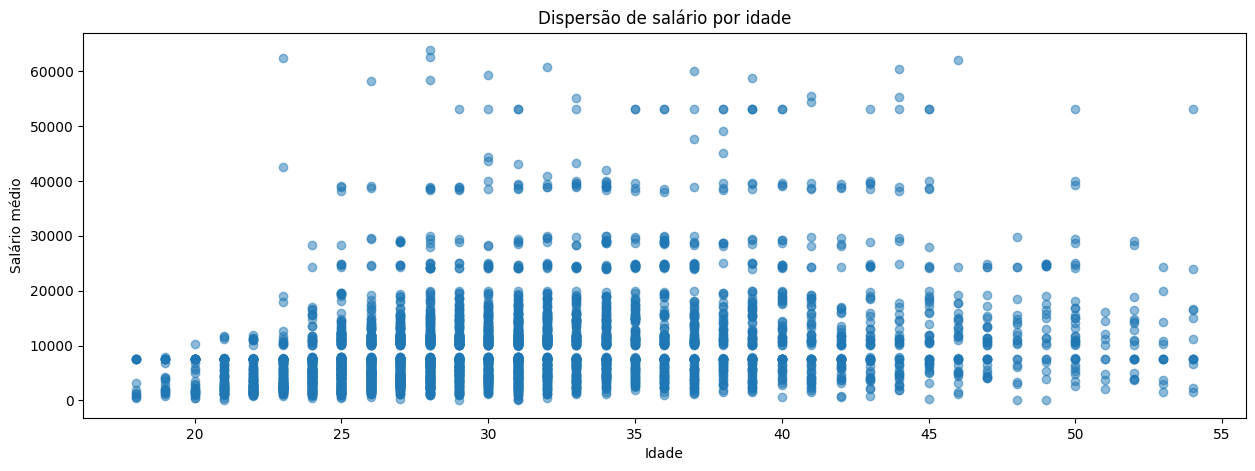

In [82]:
plt.figure(figsize=(15, 5))
plt.scatter(df['IDADE'], df['SALARIO'], alpha=0.5)
plt.title('Dispersão de salário por idade')
plt.xlabel('Idade')
plt.ylabel('Salário médio')
plt.show()

In [83]:
fig = px.scatter(df, x='IDADE', y='SALARIO', title='Dispersão de salário por idade', trendline='ols')
fig.show()